In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [3]:
def get_accuracy(df, correct, experimental):
    incorrect = 0
    for i in range(len(df)):
        if df.iloc[i][correct] != df.iloc[i][experimental]:
            incorrect += 1
        else:
            continue
    return 1-(round(incorrect/len(df),2))

In [4]:
heroes = pd.read_csv('dota_heroes728a.csv')

In [11]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hero                120 non-null    object 
 1   Strength            120 non-null    object 
 2   Agility             120 non-null    object 
 3   Intelligence        120 non-null    object 
 4   Health_base         120 non-null    int64  
 5   Health_lvl1         120 non-null    int64  
 6   Health_lvl15        120 non-null    int64  
 7   Health_lvl25        120 non-null    int64  
 8   Health_lvl30        120 non-null    int64  
 9   Health regen_base   120 non-null    float64
 10  Health regen_lvl1   120 non-null    float64
 11  Health regen_lvl15  120 non-null    float64
 12  Health regen_lvl25  120 non-null    float64
 13  Health regen_lvl30  120 non-null    float64
 14  Mana_base           120 non-null    int64  
 15  Mana_lvl1           120 non-null    int64  
 16  Mana_lvl

In [12]:
#Getting rid of columns that would directly indicate to the classifier the category of the hero
#as well as information that could not logically help here, most likely
heroes.drop(columns=['Strength', 'Intelligence', 'Agility', 'Legs', 'Gib type'], inplace=True)

In [13]:
#Dropping intermediary attribute levels
heroes.drop(columns=['Health_lvl15', 'Health_lvl25', 'Health regen_lvl15', 'Health regen_lvl25',
                    'Mana_lvl15', 'Mana_lvl25', 'Mana regen_lvl15', 'Mana regen_lvl25', 'Armor_lvl15', 'Armor_lvl25',
                    'Att/sec_lvl15', 'Att/sec_lvl25', 'Damage_lvl15', 'Damage_lvl25'], inplace=True)

In [14]:
#Further surface-level exploratory analysis

In [15]:
heroes['Collision size'].values

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24,  8, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,  8, 24,
       24, 24, 24, 24, 24,  8, 24,  8, 24, 24, 24,  8, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24])

In [12]:
heroes['Damage block'].values

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 8, 8, 8, 8, 8, 8,
       8, 8, 0, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8,
       0, 0, 8, 8, 0, 0, 8, 0, 0, 0, 8, 0, 8, 0, 8, 8, 8, 8, 8, 0, 8, 0,
       8, 0, 8, 0, 8, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 0, 0, 0, 0, 0])

In [16]:
heroes['Base attack time'].values

array([1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7, 1.7, 1.7, 2. , 1.7, 1.7, 1.7,
       1.7, 1.6, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.6, 1.9, 1.8, 1.7, 1.7, 1.7, 1.9, 1.7, 1.7, 1.7, 1.7,
       1.4, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 2. , 1.4, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.7, 1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7,
       1.7, 1.7, 1.7, 1.7, 1.6, 1.7, 1.7, 1.7, 1.7, 1.7, 1.9, 1.7, 1.7,
       1.5, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.5,
       1.7, 1.7, 1.7])

In [14]:
heroes['Vision range'].values

array(['1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '800/1800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/1000', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '1800/800',
       '1800/800', '1800/1800', '1800/1400', '1800/800', '1800/800',
       '1800/800', '1800/800', '1800/800', '1800/800', '180

In [17]:
heroes.drop(columns=['Collision size', 'Base attack time', 'Vision range'], inplace=True)

In [18]:
heroes['Magic resistance'].values

array(['25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%', '25%',
       '25%', '25%', '25%'], dtype=object)

In [19]:
heroes.drop(columns=['Attack animation', 'Magic resistance', 'Health_base', 'Mana_base',
                    'Damage_base'], inplace=True)

In [20]:
#Ranges will not be able to be parsed
heroes.drop(columns=['Damage_lvl1', 'Damage_lvl30'], inplace=True)

In [21]:
#Classifier cannot parse non-numeric input
heroes['Projectile speed'].replace({'Instant':'0'}, inplace=True)

In [22]:
#Adding column with category of each hero for eventual algorithm evaluation purposes

cats = {
    'Strength':['Abaddon', 'Alchemist', 'Axe', 'Beastmaster', 'Brewmaster',
       'Bristleback', 'Centaur_Warrunner', 'Chaos_Knight', 'Clockwerk',
       'Doom', 'Dragon_Knight', 'Earth_Spirit', 'Earthshaker',
       'Elder_Titan', 'Huskar', 'Io', 'Kunkka', 'Legion_Commander',
       'Lifestealer', 'Lycan', 'Magnus', 'Mars', 'Night_Stalker',
       'Omniknight', 'Phoenix', 'Pudge', 'Sand_King', 'Slardar',
       'Snapfire', 'Spirit_Breaker', 'Sven', 'Tidehunter', 'Timbersaw',
       'Tiny', 'Treant_Protector', 'Tusk', 'Underlord', 'Undying',
       'Wraith_King'],
    'Intelligence':['Ancient_Apparition', 'Bane', 'Batrider', 'Chen', 'Crystal_Maiden',
       'Dark_Seer', 'Dark_Willow', 'Dazzle', 'Death_Prophet', 'Disruptor',
       'Enchantress', 'Enigma', 'Grimstroke', 'Invoker', 'Jakiro',
       'Keeper_of_the_Light', 'Leshrac', 'Lich', 'Lina', 'Lion',
       "Nature's_Prophet", 'Necrophos', 'Ogre_Magi', 'Oracle',
       'Outworld_Destroyer', 'Puck', 'Pugna', 'Queen_of_Pain', 'Rubick',
       'Shadow_Demon', 'Shadow_Shaman', 'Silencer', 'Skywrath_Mage',
       'Storm_Spirit', 'Techies', 'Tinker', 'Visage', 'Void_Spirit',
       'Warlock', 'Windranger', 'Winter_Wyvern', 'Witch_Doctor', 'Zeus'],
    'Agility':['Anti-Mage', 'Arc_Warden', 'Bloodseeker', 'Bounty_Hunter',
       'Broodmother', 'Clinkz', 'Drow_Ranger', 'Ember_Spirit',
       'Faceless_Void', 'Gyrocopter', 'Hoodwink', 'Juggernaut',
       'Lone_Druid', 'Luna', 'Medusa', 'Meepo', 'Mirana', 'Monkey_King',
       'Morphling', 'Naga_Siren', 'Nyx_Assassin', 'Pangolier',
       'Phantom_Assassin', 'Phantom_Lancer', 'Razor', 'Riki',
       'Shadow_Fiend', 'Slark', 'Sniper', 'Spectre', 'Templar_Assassin',
       'Terrorblade', 'Troll_Warlord', 'Ursa', 'Vengeful_Spirit',
       'Venomancer', 'Viper', 'Weaver']
}

heroes['Category'] = (heroes['Hero'].apply(lambda x: [k for k in cats.keys() if x in cats[k]]).str[0])
heroes.replace({'Strength':0, 'Intelligence':1, 'Agility':2}, inplace=True)

In [23]:
#First clustering attempt
#Two strategies -- scaling and not scaling data

In [24]:
#Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(heroes.drop(columns=['Hero', 'Category']))
kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans.fit(scaled)

KMeans(init='random', n_clusters=3, random_state=14)

In [25]:
#Adding k means categories to data frame
heroes['clusters 1 scaled'] = kmeans.labels_

In [26]:
#Not scaling
kmeans2 = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans2.fit(heroes.drop(columns=['Hero', 'Category']))

KMeans(init='random', n_clusters=3, random_state=14)

In [27]:
#Adding second set of clusters to data frame
heroes['clusters 1 not scaled'] = kmeans2.labels_

In [28]:
heroes[['Hero', 'Category', 'clusters 1 scaled', 'clusters 1 not scaled']]

,Hero,Category,clusters 1 scaled,clusters 1 not scaled
0,Abaddon,0,0,2
1,Alchemist,0,0,2
2,Axe,0,0,2
3,Beastmaster,0,0,2
4,Brewmaster,0,0,2
5,Bristleback,0,0,2
6,Centaur_Warrunner,0,0,2
7,Chaos_Knight,0,0,2
8,Clockwerk,0,0,2
9,Doom,0,0,2


In [29]:
#Swapping labels of 2 clusters so they match true category labels
heroes['clusters 1 not scaled'].replace({2:0, 0:2}, inplace=True)

In [30]:
#Accuracy metrics for first round of clustering

strength = heroes[heroes['Category'] == 0][['Hero', 'Category', 'clusters 1 scaled', 'clusters 1 not scaled']]
agility = heroes[heroes['Category'] == 2][['Hero', 'Category', 'clusters 1 scaled', 'clusters 1 not scaled']]
intelligence = heroes[heroes['Category'] == 1][['Hero', 'Category', 'clusters 1 scaled', 'clusters 1 not scaled']]

print('Strength: ', get_accuracy(strength, 'Category', 'clusters 1 scaled'),
     get_accuracy(strength, 'Category', 'clusters 1 not scaled'))
print('Agility: ', get_accuracy(agility, 'Category', 'clusters 1 scaled'),
     get_accuracy(agility, 'Category', 'clusters 1 not scaled'))
print('Intelligence: ', get_accuracy(intelligence, 'Category', 'clusters 1 scaled'),
     get_accuracy(intelligence, 'Category', 'clusters 1 not scaled'))

Strength:  0.87 0.9
Agility:  0.53 0.29000000000000004
Intelligence:  0.86 0.91


In [31]:
#We can do better.

In [32]:
#Visualizations

In [33]:
#Health

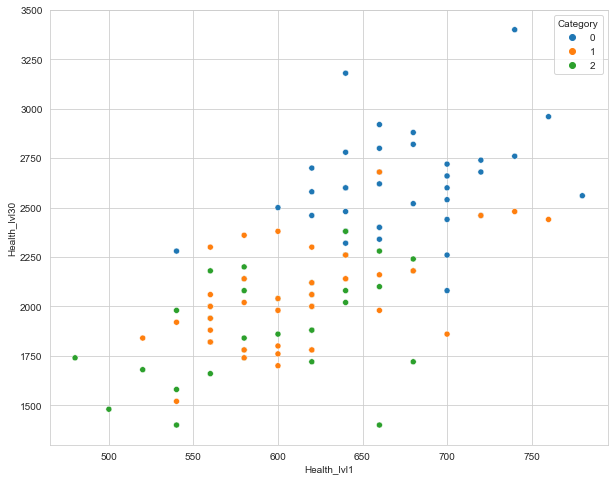

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health_lvl1', y='Health_lvl30', hue='Category', palette='tab10');

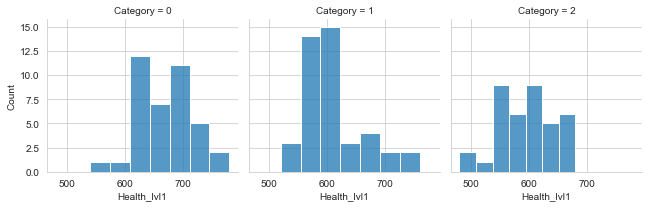

In [35]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health_lvl1');

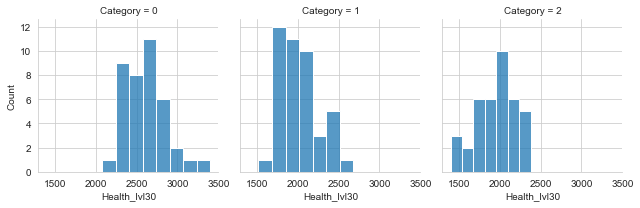

In [36]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health_lvl30');

In [37]:
#Health regen

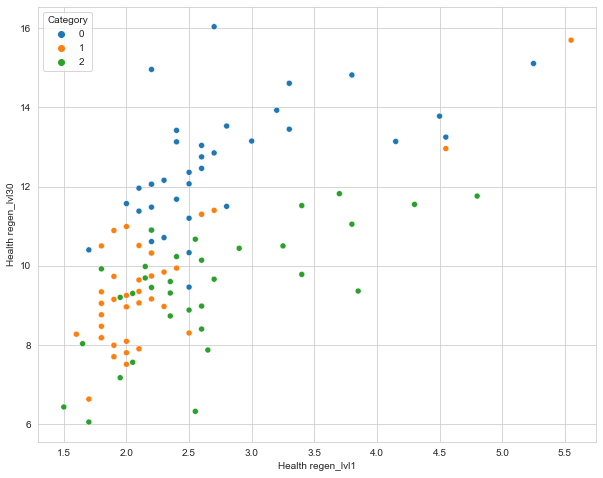

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health regen_lvl1', y='Health regen_lvl30', hue='Category', palette='tab10');

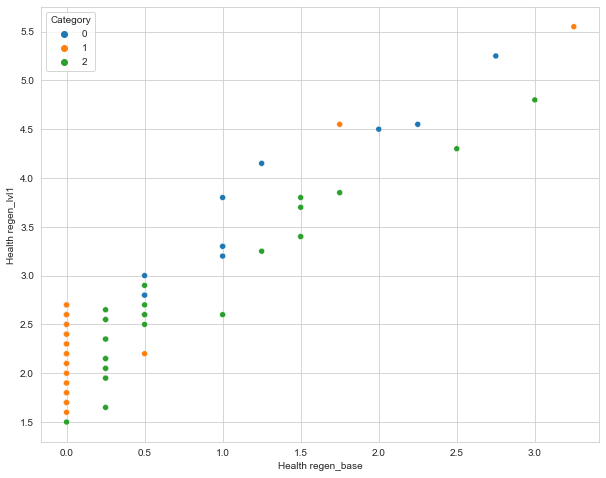

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health regen_base', y='Health regen_lvl1', hue='Category', palette='tab10');

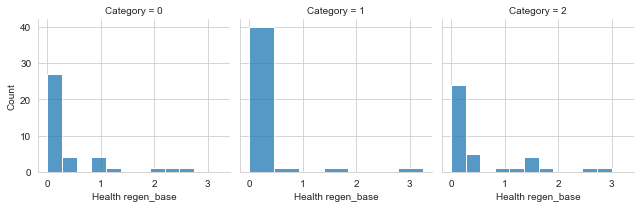

In [40]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health regen_base');

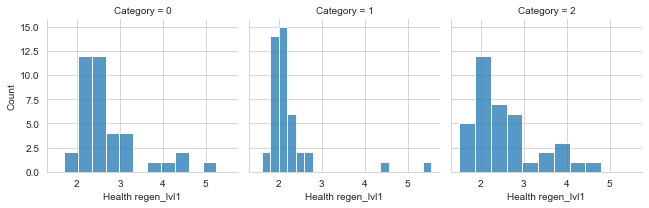

In [41]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health regen_lvl1');

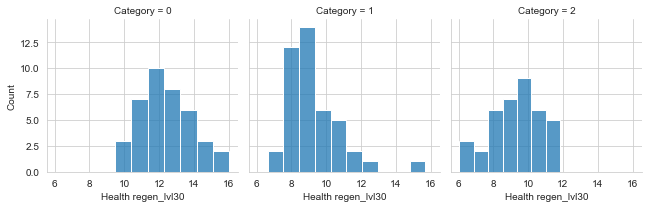

In [42]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Health regen_lvl30');

In [43]:
#Mana

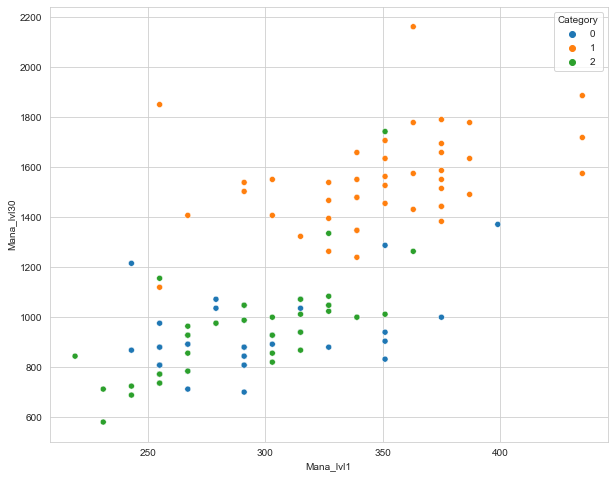

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl1', y='Mana_lvl30', hue='Category', palette='tab10');

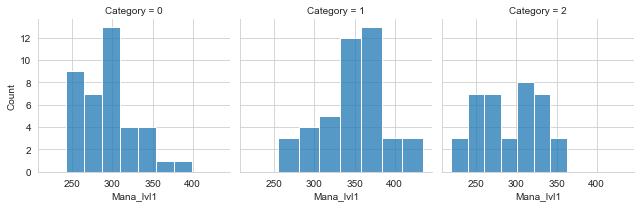

In [45]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana_lvl1');

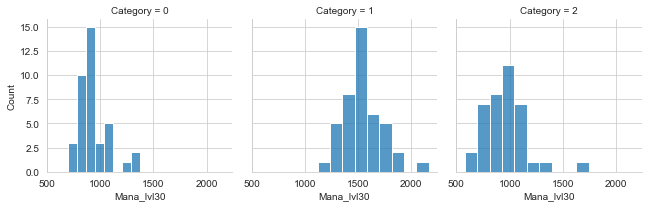

In [46]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana_lvl30');

In [47]:
#Mana regen

<AxesSubplot:xlabel='Mana regen_lvl1', ylabel='Mana regen_lvl30'>

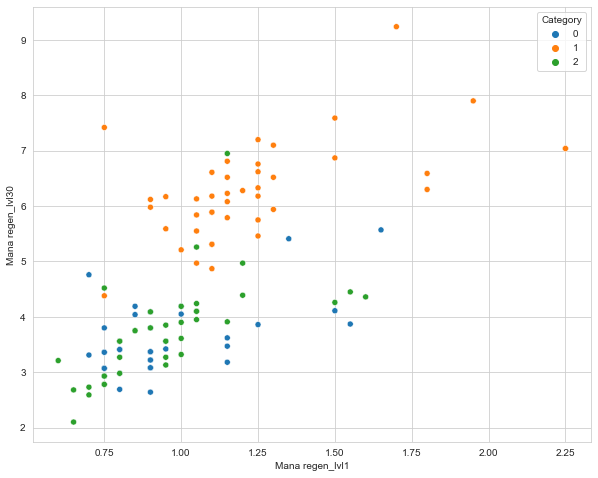

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana regen_lvl1', y='Mana regen_lvl30', hue='Category', palette='tab10')

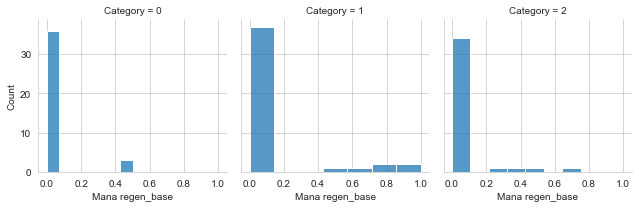

In [49]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana regen_base');

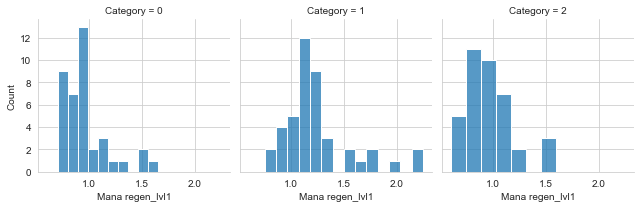

In [50]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana regen_lvl1');

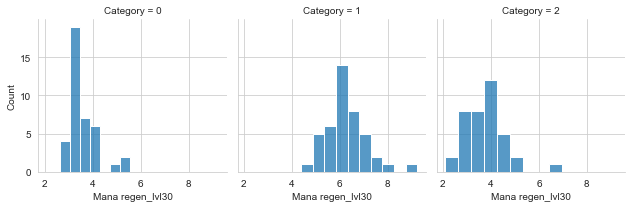

In [51]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Mana regen_lvl30');

In [52]:
#Armor

<AxesSubplot:xlabel='Armor_lvl1', ylabel='Armor_lvl30'>

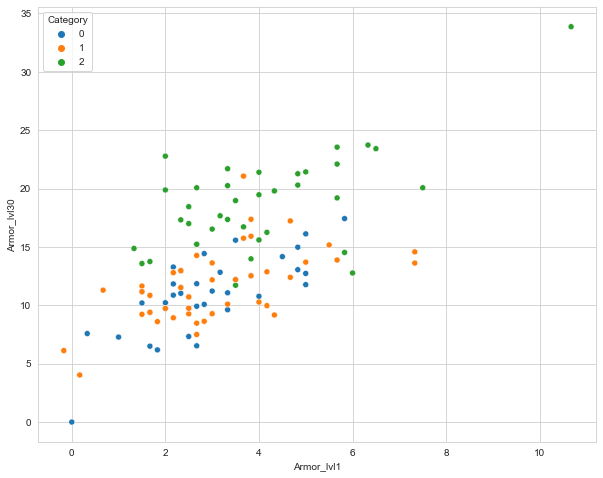

In [53]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl1', y='Armor_lvl30', hue='Category', palette='tab10')

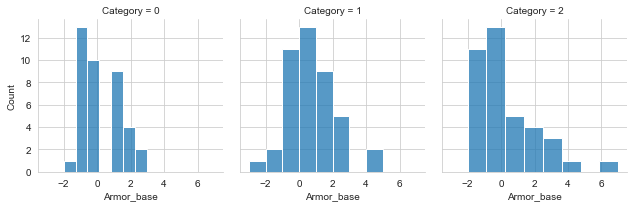

In [54]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Armor_base');

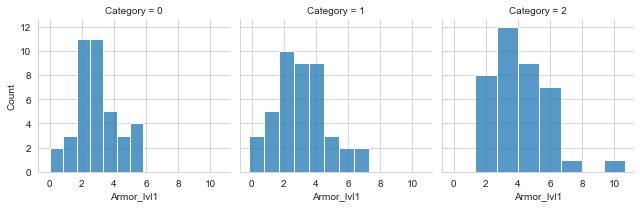

In [55]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Armor_lvl1');

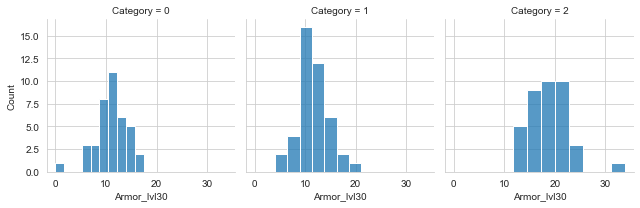

In [56]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Armor_lvl30');

In [57]:
#Attack speed

<AxesSubplot:xlabel='Att/sec_lvl1', ylabel='Att/sec_lvl30'>

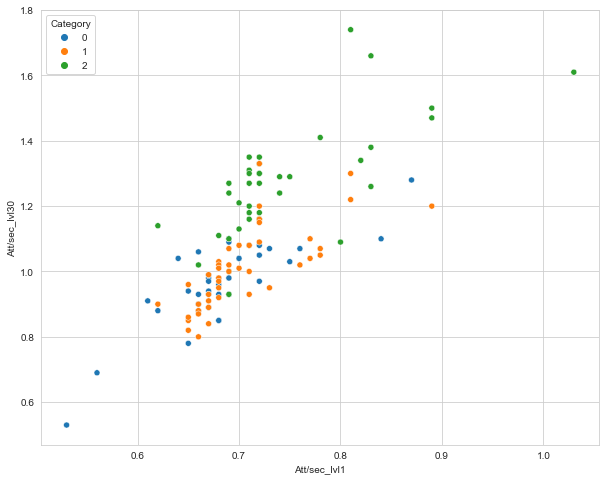

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Att/sec_lvl1', y='Att/sec_lvl30', hue='Category', palette='tab10')

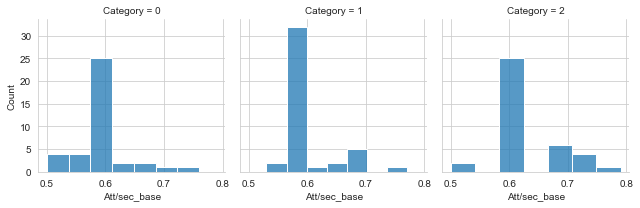

In [59]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Att/sec_base');

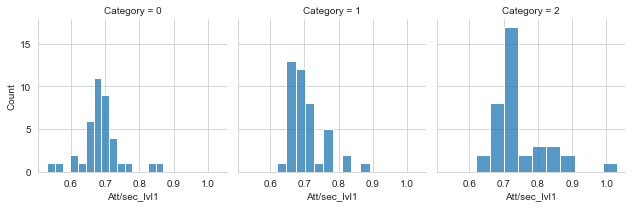

In [60]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Att/sec_lvl1');

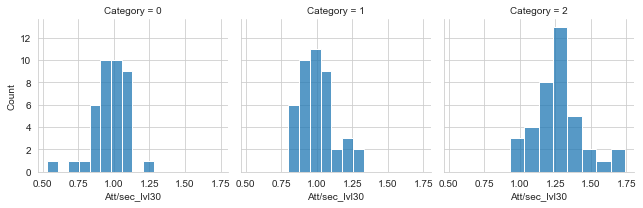

In [61]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Att/sec_lvl30');

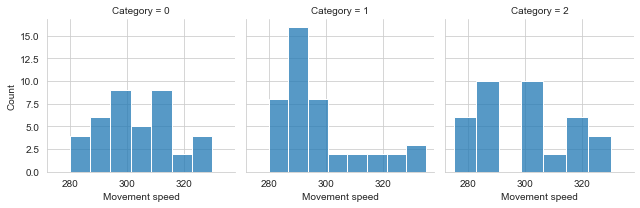

In [62]:
#Movement speed
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Movement speed');

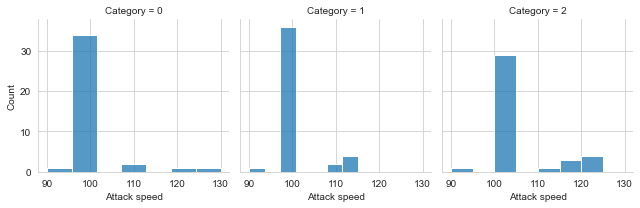

In [63]:
#Attack speed
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Attack speed');

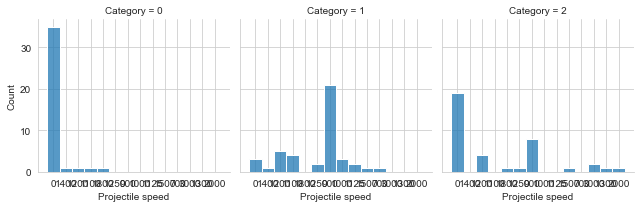

In [64]:
#Projectile speed
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Projectile speed');

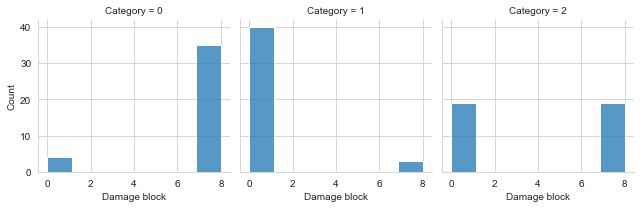

In [65]:
#Damage block
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Damage block');

In [66]:
#Dropping various columns based on observations gleaned from visualization
heroes2 = heroes.copy()
heroes2.drop(columns=['Health regen_base', 'Health regen_lvl1', 'Mana regen_base',
                        'Mana regen_lvl1', 'Mana regen_lvl30', 'Armor_base', 'Armor_lvl1',
                        'Att/sec_base', 'Att/sec_lvl1', 'Attack speed'], inplace=True)

In [67]:
#What else could we look at?

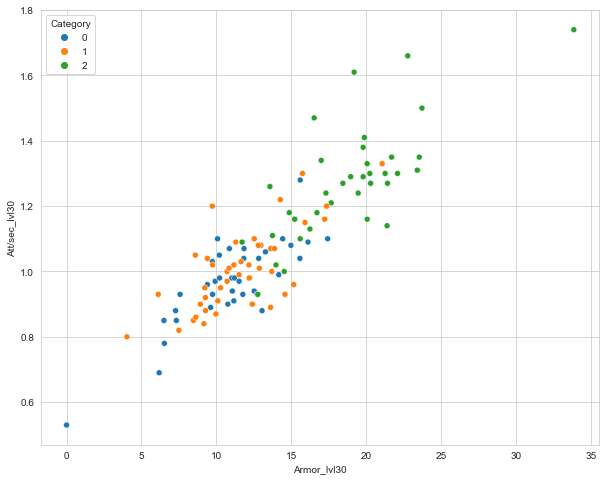

In [68]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl30', y='Att/sec_lvl30', hue='Category', palette='tab10');

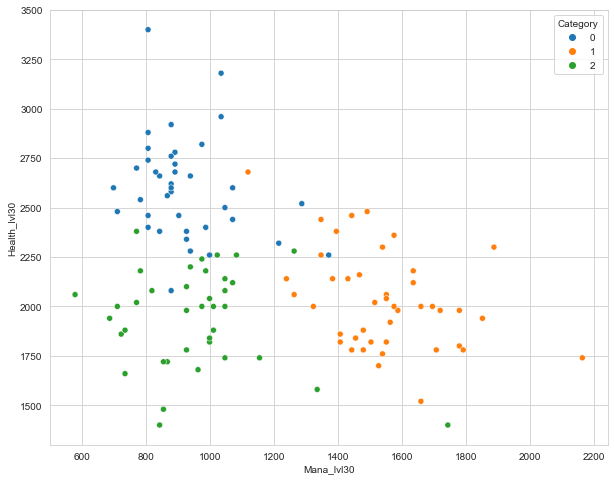

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

In [70]:
#Natural clustering

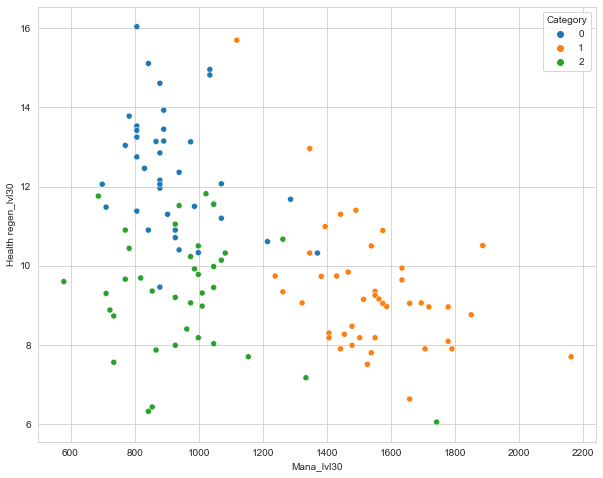

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Mana_lvl30', y='Health regen_lvl30', hue='Category', palette='tab10');

In [72]:
#More clustering

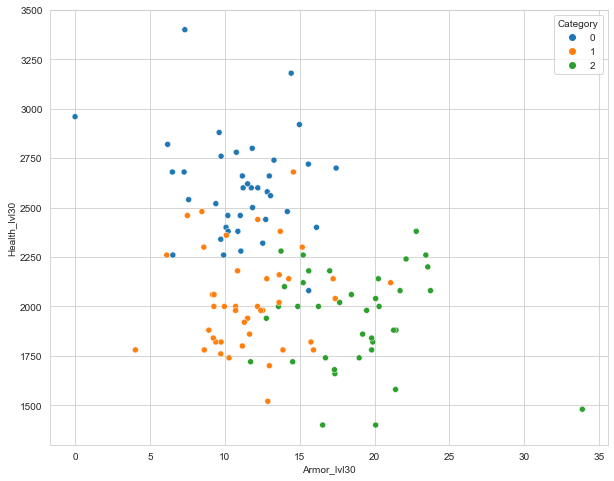

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Armor_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

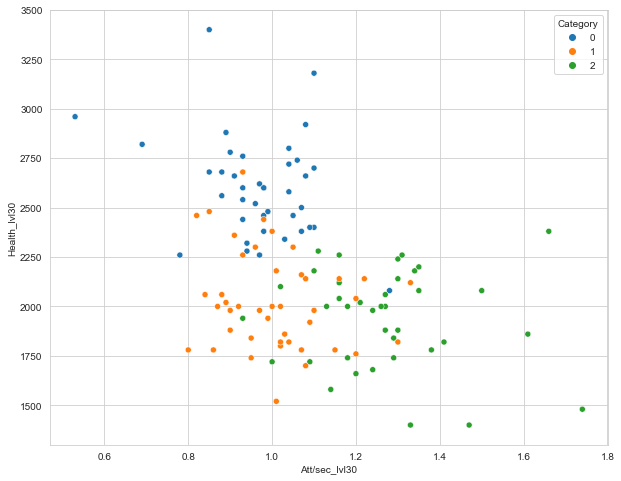

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Att/sec_lvl30', y='Health_lvl30', hue='Category', palette='tab10');

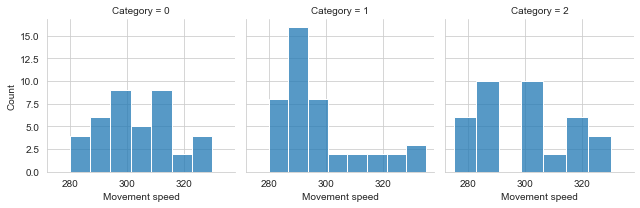

In [75]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Movement speed');

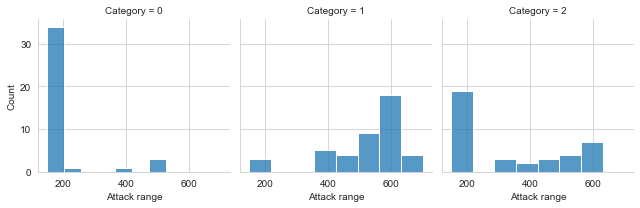

In [76]:
f = sns.FacetGrid(data=heroes, col='Category')
f.map(sns.histplot, 'Attack range');

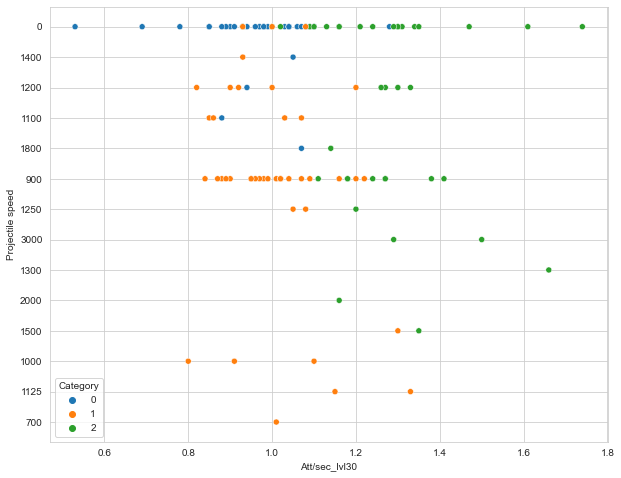

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Att/sec_lvl30', y='Projectile speed', hue='Category', palette='tab10');

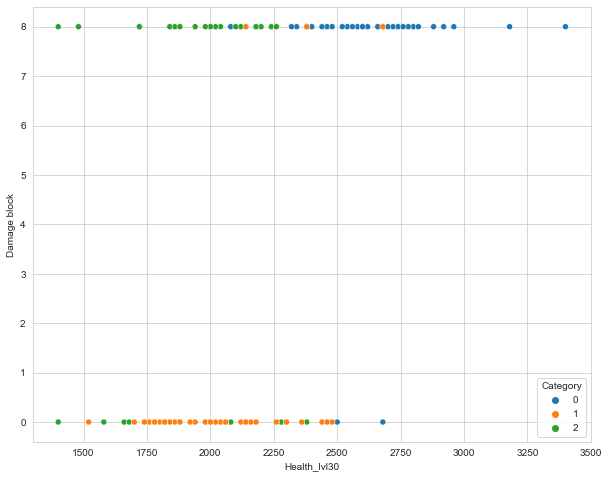

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health_lvl30', y='Damage block', hue='Category', palette='tab10');

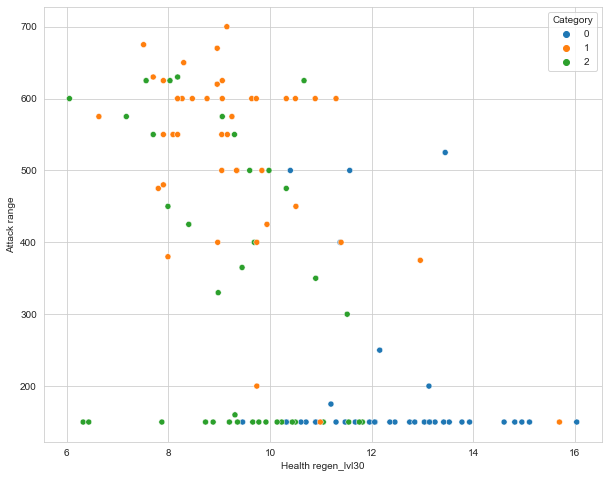

In [79]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=heroes, x='Health regen_lvl30', y='Attack range', hue='Category', palette='tab10');

In [80]:
#Extremely noticeable natural clustering is exhibited for the first 5 predictors
#health, health regen, mana, armor, and att/sec
#These seem most likely to give us the best results. Overloading the algorithm will
#most likely lead to a drop in accuracy

In [81]:
#Applying k means once again

In [82]:
#Scaling
scaler2 = StandardScaler()
scaled2 = scaler.fit_transform(heroes[['Health_lvl30', 'Health regen_lvl30', 'Mana_lvl30', 'Armor_lvl30', 
                                      'Att/sec_lvl30']])
kmeans3 = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans3.fit(scaled2)

KMeans(init='random', n_clusters=3, random_state=14)

In [83]:
heroes['clusters 2 scaled'] = kmeans3.labels_

In [84]:
kmeans4 = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=14)
kmeans4.fit(heroes[['Health_lvl30', 'Health regen_lvl30', 'Mana_lvl30', 'Armor_lvl30', 'Att/sec_lvl30']])

KMeans(init='random', n_clusters=3, random_state=14)

In [85]:
heroes['clusters 2 not scaled'] = kmeans4.labels_

In [86]:
heroes[['Category', 'clusters 2 scaled', 'clusters 2 not scaled']]

,Category,clusters 2 scaled,clusters 2 not scaled
0,0,2,0
1,0,2,1
2,0,2,0
3,0,2,0
4,0,2,0
5,0,2,0
6,0,2,0
7,0,2,0
8,0,2,0
9,0,2,0


In [90]:
#Swapping labels to conform to encoding of true categories
heroes['clusters 2 scaled'].replace({2:0, 0:2}, inplace=True)
heroes['clusters 2 not scaled'].replace({1:2, 2:1}, inplace=True)

In [91]:
#Accuracy metrics for final round of clustering

strength = heroes[heroes['Category'] == 0][['Hero', 'Category', 'clusters 2 scaled', 'clusters 2 not scaled']]
agility = heroes[heroes['Category'] == 2][['Hero', 'Category', 'clusters 2 scaled', 'clusters 2 not scaled']]
intelligence = heroes[heroes['Category'] == 1][['Hero', 'Category', 'clusters 2 scaled', 'clusters 2 not scaled']]

print('Strength: ', get_accuracy(strength, 'Category', 'clusters 2 scaled'),
     get_accuracy(strength, 'Category', 'clusters 2 not scaled'))
print('Agility: ', get_accuracy(agility, 'Category', 'clusters 2 scaled'),
     get_accuracy(agility, 'Category', 'clusters 2 not scaled'))
print('Intelligence: ', get_accuracy(intelligence, 'Category', 'clusters 2 scaled'),
     get_accuracy(intelligence, 'Category', 'clusters 2 not scaled'))

Strength:  0.95 0.9
Agility:  0.92 0.89
Intelligence:  0.84 0.95
